In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
list = {'Age':[23, 23, 27, 27, 39,41, 47, 49, 50, 52, 54, 54, 56, 57, 58, 58, 60, 61], 
        'Fat%':[9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2,34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7 ]}

df = pd.DataFrame(data=list)

df

,Age,Fat%
0,23,9.5
1,23,26.5
2,27,7.8
3,27,17.8
4,39,31.4
5,41,25.9
6,47,27.4
7,49,27.2
8,50,31.2
9,52,34.6


# Question 1 

Part a - Calculate the mean, median, and standard deviation of age and %fat.

In [23]:
mean_age = round(df['Age'].mean(), 2)
mean_bf = round(df['Fat%'].mean(), 2)

print('The mean age is: '+ str(mean_age)+'\n')
print('The mean body fat is: {}% '.format(mean_bf) +'\n' )

median_age = round(df['Age'].median(), 2)
median_bf = round(df['Fat%'].median(), 2)

print('The median age is: '+ str(median_age)+'\n')
print('The median body fat is: {}%'.format(median_bf) +'\n' )

sd_age = round(np.std(df['Age']), 2)
sd_bf = round(np.std(df['Fat%']), 2)

print('The standard deviation for age is: '+ str(sd_age)+'\n')
print('The standard deviation for body fat is: '+ str(sd_bf) +'\n' )

The mean age is: 46.44

The mean body fat is: 28.78% 

The median age is: 51.0

The median body fat is: 30.7%

The standard deviation for age is: 12.85

The standard deviation for body fat is: 8.99



Part b - Draw the boxplots for age and %fat.

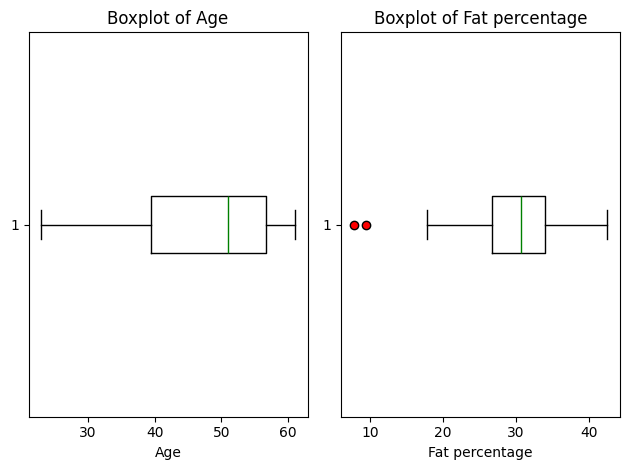

In [36]:
plt.subplot(1,2,1)
plt.boxplot(df['Age'], medianprops=dict(color='green'), flierprops=dict(markerfacecolor='red', marker='o'),notch = False, orientation='horizontal', )
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.boxplot(df['Fat%'], medianprops=dict(color='green'), flierprops=dict(markerfacecolor='red', marker='o'), notch = False, orientation='horizontal', )
plt.title('Boxplot of Fat percentage')
plt.xlabel('Fat percentage')

plt.tight_layout()
plt.show()

# Question 3


In [37]:
obj1 = np.array([18, 3, 40, 12])
obj2 = np.array([25, 7, 35, 9])

(a) Compute the Euclidean distance between the two objects.

In [ ]:
# The euclidean distance is shortest distance between two arrays
euclidean_distance = np.linalg.norm(obj2 - obj1)
print('The Euclidean distance is : {} \n'.format(euclidean_distance))

The Euclidian distance is : 9.9498743710662 



(b) Compute the Manhattan distance between the two objects.

In [48]:
manhattan_distance = sum((abs(a-b) for a, b in zip(obj1, obj2)))
print('The Manhattan distance is : {} \n'.format(manhattan_distance))


The Manhattan distance is : 19 



(c) Compute the Minkowski distance between the two objects, using q = 4.


In [49]:
from scipy.spatial import distance


In [50]:
p_value = 4

minkowski_distance_pvalue_4 = distance.minkowski(obj1, obj2, p_value)
print('The Minkowski distance when p=4 is : {} \n'.format(minkowski_distance_pvalue_4))


The Minkowski distance when p=4 is : 7.615207066757405 



# Question 4 


In [61]:
data = np.array([[1.5, 1.7], [2.0, 1.9], [1.6, 1.8], [1.2, 1.5], [1.5, 1.0]])
index_values = ['x1', 'x2', 'x3', 'x4', 'x5']
column_values= ['A1', 'A2']
df4 = pd.DataFrame(data= data, index=index_values, columns=column_values )
df4

,A1,A2
x1,1.5,1.7
x2,2.0,1.9
x3,1.6,1.8
x4,1.2,1.5
x5,1.5,1.0


(a) Consider the data as 2-D data points. Given a new data point, x = (1.4,1.6) as a query, rank the database points based on similarity with the query using Euclidean distance, Manhattan distance, and cosine similarity.

In [ ]:
x = [1.4, 1.6]
df_euclidean = pd.DataFrame()

for a in range(len(data)):
    #Calculating and adding euclidean distance of each point in the original data array from point x to the newly initialized dataframe
    new_row= pd.DataFrame({'Original point': [df4.index[a]] , 'Euclidean distance from point':[ np.linalg.norm(x - data[a])] })
    df_euclidean = pd.concat([df_euclidean, new_row], ignore_index=True)

#Sorting by values of euclidean distance in ascending order to get highest similirity
df_euclidean_sorted = df_euclidean.sort_values(by=['Euclidean distance from point'], ascending=True)
df_euclidean_sorted

,Original point,Euclidean distance from point
0,x1,0.141421
3,x4,0.223607
2,x3,0.282843
4,x5,0.608276
1,x2,0.670820


In [ ]:

df_manhattan = pd.DataFrame()
for a in range(len(data)):
    #Calculating and adding manhattan distance of each point in the original data array from point x to the newly initialized dataframe
    new_row= pd.DataFrame({'Original point': [df4.index[a]] , 'Manhattan distance from point':[np.sum(np.abs(x - data[a]))] })
    df_manhattan = pd.concat([df_manhattan, new_row], ignore_index=True)

#Sorting by values of manhattan distance in ascending order to get highest similarity
df_manhattan_sorted = df_manhattan.sort_values(by=['Manhattan distance from point'], ascending=True)
df_manhattan_sorted

,Original point,Manhattan distance from point
0,x1,0.2
3,x4,0.3
2,x3,0.4
4,x5,0.7
1,x2,0.9


In [109]:
df_cosine = pd.DataFrame()

for a in range(len(data)):
    #Calculating the cosine similirity by first calculating numerator ie: dot product
    cosine_numerator = np.dot(x, data[a])

    #Computing euclidean norms of both x and data[a]
    norm_x = np.linalg.norm(x)
    norm_data_point = np.linalg.norm(data[a])

    #Calculating the denominator ie: product of both norms
    cosine_denominator = norm_x * norm_data_point

    #Calculating cosine similarity
    cosine_similarity = cosine_numerator/cosine_denominator

    #Adding values to previously initialized dataframe
    new_row= pd.DataFrame({'Original point': [df4.index[a]] , 'Cosine similarity with point':[cosine_similarity] })
    df_cosine= pd.concat([df_cosine, new_row], ignore_index=True)

#Sorting the created datafram across the cosine similarity values setting order to descending order to get maximum similarity
df_cosine_sorted = df_cosine.sort_values(by=['Cosine similarity with point'], ascending=False)
df_cosine_sorted

,Original point,Cosine similarity with point
0,x1,0.999991
2,x3,0.999969
3,x4,0.999028
1,x2,0.995752
4,x5,0.965363


(b) Normalize the data set to make the norm of each data point equal to 1. Use Euclidean distance on the transformed data to rank the data points.